# <span class="bg-primary"> 5. OC - EXERCICE - INTRO MACHINE LEARNING HOUSE_DATA</span>

In [164]:
# Chargement des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# %matplotlib inline

In [26]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [27]:
pd.set_option('display.max_row', 827)
pd.set_option('display.max_column', 3)

## <span class="bg-info"> 1. Chargement du jeu de données<span>

In [13]:
# Chargement du dataset
house_path = 'C:/2.DATA_SCIENCE/LOE/7. OPENCLASSROOM\OPENCLASSROOM_COURS/5-INTRO_MACHINE_LEARNING/'
house_data = pd.read_csv('house_data.csv')

## <span class="bg-info"> 2. Informations générales sur le jeu de données<span>

### <span class="bg-warning">2.1. Analyse de la forme des données</span>

### <span class="bg-success">2.1.1. Trouver la target ?</span>

La __target__ est la colonne __'Price'__

### <span class="bg-success">2.1.2. Dimensions</span>

In [14]:
house_data.shape
print(f'DataFrame composé de {house_data.shape[0]} lignes et {house_data.shape[1]} colonnes')

DataFrame composé de 827 lignes et 3 colonnes


In [15]:
# 5 première lignes
house_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [53]:
# Résumé statistique
house_data.describe(include='all')

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [25]:
# nom des colonnes
for i in range(house_data.shape[1]):
    print(house_data.columns[i])

price
surface
arrondissement


### <span class="bg-success">2.1.3. Types des variables</span>

['price' 'surface' 'arrondissement']
[dtype('int64'), dtype('float64'), dtype('float64')]


In [98]:
def get_types(dataframe):
    variable = []
    types = []
    for i in range(house_data.shape[1]):
        variable.append(house_data.columns[i])
        types.append(house_data.dtypes[i])

    table = pd.concat([pd.Series(variable), pd.Series(types)], axis=1)
    table.columns = ['Variable', 'Type']
    
    return table.style.background_gradient('Blues')

In [99]:
get_types(house_data)

,Variable,Type
0,price,int64
1,surface,float64
2,arrondissement,float64


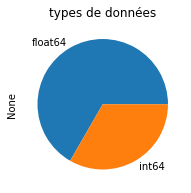

In [70]:
plt.figure(figsize=(6,3))
house_data.dtypes.value_counts().plot.pie()
plt.title("types de données")
plt.show()

### <span class="bg-success">2.1.4. Valeurs manquantes par colonnes</span>

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           827 non-null    int64  
 1   surface         822 non-null    float64
 2   arrondissement  822 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 19.5 KB


Conculsion : Il manque quelques données dans surface et arrondissement

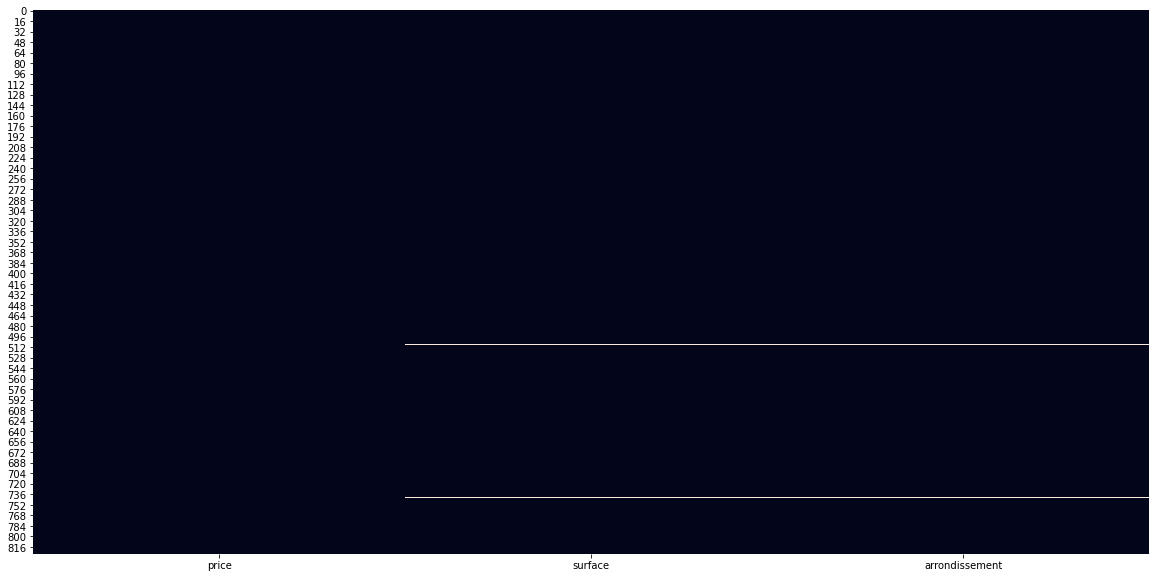

In [60]:
# visualisation des données manquantes ==> très peu de données manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.show()

Conclusion : très peu de données manquantes

In [62]:
def get_missing_values(data):
    
    values = data.isnull().sum()
    percentage = 100 * data.isnull().sum() / len(data)
    table = pd.concat([values, percentage.round(2)], axis=1)
    table.columns = ['Nombre de valeurs manquantes', '% de valeurs manquantes']
    
    return table[table['Nombre de valeurs manquantes'] != 0].sort_values('% de valeurs manquantes', ascending = False).style.background_gradient('Blues')

In [63]:
get_missing_values(df)

,Nombre de valeurs manquantes,% de valeurs manquantes
surface,5,0.600000
arrondissement,5,0.600000


In [ ]:
Conclusion : on peut supprimer les données manquantes par lignes

In [100]:
# Nombre total de cellules vides dans le dataframe
nbr_cel_nan = sum(df.isna().values.ravel())
print('Nombre total de cellules vides : ', nbr_cel_nan)

Nombre total de cellules vides :  10


In [102]:
#  OU Nombre total de cellule avec valeurs manquantes :
nbr_cel_nul = sum(df.isnull().values.ravel())
print('Nombre total de cellules vides : ', nbr_cel_nul)

Nombre total de cellules vides :  10


In [119]:
# Nombre de colonnes ayant au moins une valeur manquante
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For rows

price             0
surface           5
arrondissement    5
dtype: int64

In [126]:
# Nombre de ligne ayant au moins une valeur manquante
nb = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows 
nb[nb>0]

149    2
339    2
509    2
674    2
742    2
dtype: int64

In [127]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

price             0.000000
surface           0.006046
arrondissement    0.006046
dtype: float64

### <span class="bg-success">2.1.5. Graphs généralistes</span>

In [ ]:
pourcentage_donnees_colonnes = pd.DataFrame(data=(data_alimentation.notnull().sum(axis=0).divide(len(df)).multiply(100).sort_values()),columns=['% données'])

pourcentage_donnees_colonnes.plot(kind='barh', figsize=(8, 12), xlim=(0, 100), 
                      title='Pourcentage de données pour les variables "alimentation"')
plt.grid(True, axis='x', linestyle=':')
plt.tight_layout()

In [58]:
# afficher toutes les moyennes des valeurs quantitatives
def moyenne(x):
    return(x.mean())

#appel de la fonction sur l'ensemble des colonnes du DataFrame
resultat = house_data.select_dtypes(exclude=['object']).apply(moyenne,axis=0)
print(resultat)

price             2007.342201
surface             58.045925
arrondissement       4.142336
dtype: float64


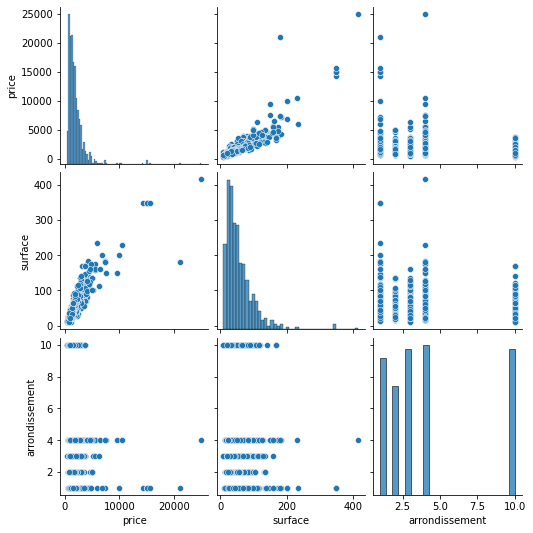

In [50]:
#  affiche les graphs de seaborn pour toutes les variables
sns.pairplot(house_data)
plt.show()

### <span class="bg-warning">2.2. Analyse du Fond</span>

### <span class="bg-success">2.2.1. Analyse de la forme des données</span>

In [64]:
# travail sur une copie
df = house_data.copy()

### <span class="bg-danger">Examen de la colonne target</span>

In [65]:
y = df['price']

In [66]:
y.value_counts(normalize=True);

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


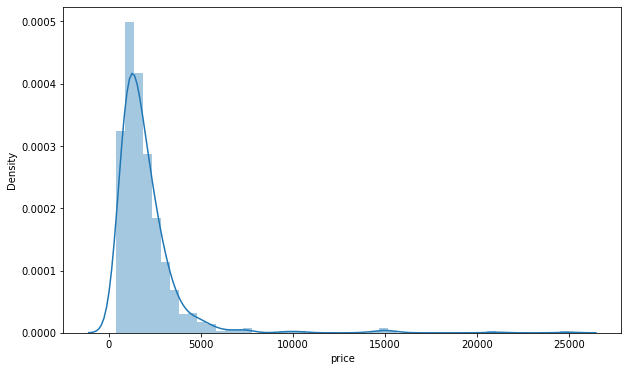

In [135]:
plt.figure(figsize=(10,6))
sns.distplot(y)
plt.draw()

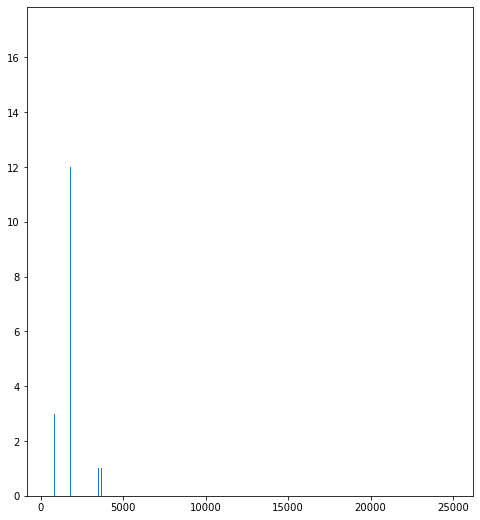

In [139]:
# data=y.value_counts()
# plt.figure(figsize=(8,9))
# plt.bar(data.index, data)
# plt.draw()

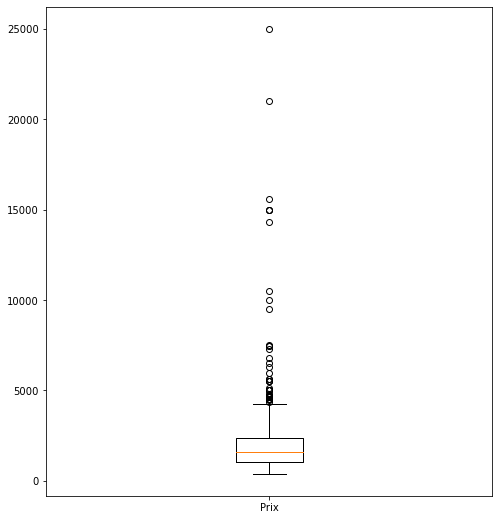

In [141]:
plt.figure(figsize=(8,9))
plt.boxplot(y)
plt.xticks([1],['Prix'])
plt.draw()

Conclusion: outliers après 8000 euros ==> supprime les données

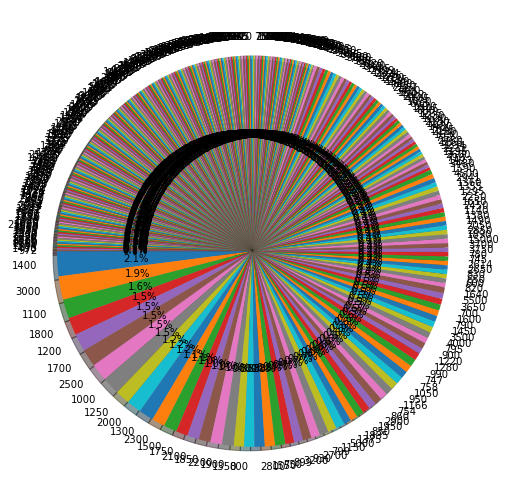

In [143]:
data=y.value_counts()
plt.figure(figsize=(9,9))
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', shadow=True, startangle=900)
plt.draw()

## <span class="bg-info"> 3. Nettoyage du jeu de données<span>

### <span class="bg-warning">3.1 Valeurs manquantes par lignes<span>

In [146]:
# suppression des lignes avec données manquantes
data_na = house_data.dropna()

In [151]:
# suppression des données dont prix > 8000 euros : outliers
data = data_na[y < 8000]

# réindexation
data = data.reset_index(drop = True)

<ipython-input-151-46b94af042b2>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data_na[y < 8000]


### <span class="bg-warning">3.2 Doublons en lignes et colonnes redondantes</span>

In [ ]:
# pas de doublons
# df.drop_duplicates( subset='code', keep='first', inplace=True)
# df.shape
# print('Il y a {} lignes '.format(df.shape[0]) + 'et {} colonnes dans le jeu de données.'.format(df.shape[1]))

### <span class="bg-warning">3.3 Modification de certains noms de colonnes</span>

In [ ]:
# pas besoin ici
# df.columns =df.columns.str.replace('-','_')
# df.columns.to_list()

### <span class="bg-warning">3.4 __Elimination__ des colonnes inutiles pour l'application</span>

In [ ]:
# s besoin ici
# data_alimentation = df.loc[:, ['allergens','traces','traces_tags','traces_en','additives_n','additives_tags','additives_en','ingredients_from_palm_oil_n','ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_tags','nutriscore_score','nutriscore_grade','nova_group','pnns_groups_1','pnns_groups_2','energy_kj_100g','energy_kcal_100g','energy_100g','energy_from_fat_100g','fat_100g','saturated_fat_100g','_butyric_acid_100g','_arachidic_acid_100g','_behenic_acid_100g','_cerotic_acid_100g','monounsaturated_fat_100g','polyunsaturated_fat_100g','omega_3_fat_100g','_alpha_linolenic_acid_100g','_eicosapentaenoic_acid_100g','_docosahexaenoic_acid_100g','omega_6_fat_100g','_linoleic_acid_100g','_arachidonic_acid_100g','trans_fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g','_sucrose_100g','_lactose_100g','starch_100g','polyols_100g','fiber_100g','_soluble_fiber_100g','_insoluble_fiber_100g','proteins_100g','serum_proteins_100g','nucleotides_100g','salt_100g','sodium_100g','alcohol_100g','vitamin_a_100g','vitamin_d_100g','vitamin_e_100g','vitamin_k_100g','vitamin_c_100g','vitamin_b1_100g','vitamin_b2_100g','vitamin_pp_100g','vitamin_b6_100g','vitamin_b9_100g','folates_100g','vitamin_b12_100g','biotin_100g','pantothenic_acid_100g','bicarbonate_100g','potassium_100g','chloride_100g','calcium_100g','phosphorus_100g','iron_100g','magnesium_100g','zinc_100g','nutrition_score_fr_100g','fruits_vegetables_nuts_100g','fruits_vegetables_nuts_dried_100g','fruits_vegetables_nuts_estimate_100g']]

In [ ]:
# représentation des données conservées
# pourcentage_donnees_colonnes = pd.DataFrame(data=(data_alimentation.notnull().sum(axis=0).divide(len(df)).multiply(100).sort_values()),columns=['% données'])

# pourcentage_donnees_colonnes.plot(kind='barh', figsize=(8, 12), xlim=(0, 100), 
#                       title='Pourcentage de données pour les variables "alimentation"')
# plt.grid(True, axis='x', linestyle=':')
# plt.tight_layout()

In [157]:
# valeurs manquantes pour les colonnes conservées
data_mis_val = data.loc[:, ['surface','arrondissement']]

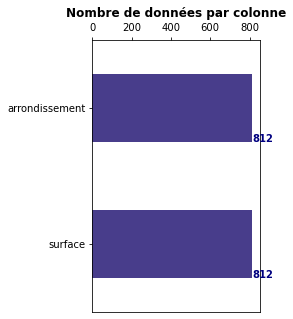

In [158]:
val_manquantes = data_mis_val.count()
val_manquantes.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(3,5))
val_manquantes.plot.barh(ax=ax, color='darkslateblue')
plt.gca().invert_yaxis()
ax.set_title("Nombre de données par colonne", fontweight='bold')
ax.xaxis.tick_top()
for i, v in enumerate(val_manquantes):
    ax.text(v + 3, i + .25, str(v), color='navy', fontweight='bold')

In [160]:
data.shape

(812, 3)

In [ ]:
Conclusion :aucune donnée manquante, le nettoyage est bien effectué

### <span class="bg-danger">Signification des variables</span>

In [174]:
#  travail sur une copie : df
df = data.copy()

pandas.core.frame.DataFrame

In [ ]:
# les variables sont simples, prix, surface en m2 et arraondissement

### <span class="bg-danger">Histogramme des variables continues</span>

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


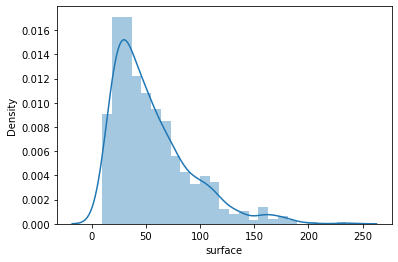

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


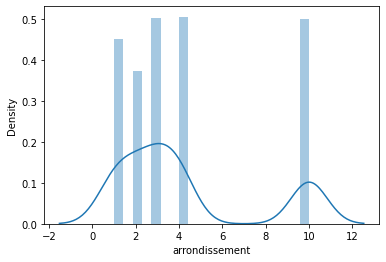

In [175]:
# variable surface
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [180]:
# for col in df.select_dtypes('float'):
#     plt.figure()
#     df[col].value_counts().plot.pie()

### <span class="bg-danger">Variables quantitatives</span>

In [ ]:
# pas dans notre cas à part l'arrondissements
# for col in df.select_dtypes('object'):
#     print(f'{col :-<50} {df[col].unique()}')

In [ ]:
# for col in df.select_dtypes('object'):
#     plt.figure()
#     df[col].value_counts().plot.pie()

In [192]:
print(df['arrondissement'].value_counts())

4.0     176
3.0     175
10.0    174
1.0     157
2.0     130
Name: arrondissement, dtype: int64


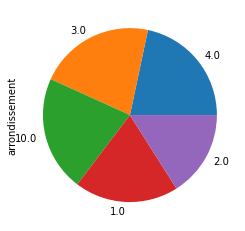

In [182]:
plt.figure()
df['arrondissement'].value_counts().plot.pie()
plt.show()

### <span class="bg-danger">Relation Variables / Target</span>

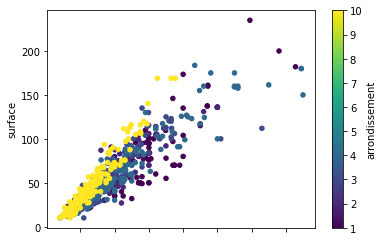

In [178]:
#  voir les données nettoyées
df.plot.scatter("price", "surface", c="arrondissement", colormap='viridis')
plt.show()

C:\Users\Outils\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


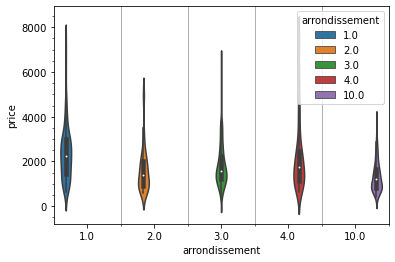

In [197]:
ax1 = sns.violinplot("arrondissement", "price", data=df, hue='arrondissement')
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

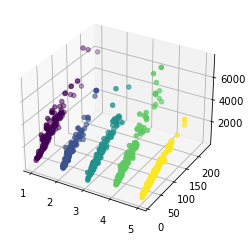

In [198]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure().gca(projection='3d')

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = df['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

fig.scatter(tmp_arr, df['surface'], df['price'], c=tmp_arr, cmap="viridis")
plt.show()

### <span class="bg-danger">TARGET /sous-ensembles par arrondissement</span>

In [210]:
arr1_df = df[df['arrondissement'] == 1.0]
arr2_df = df[df['arrondissement'] == 2.0]
arr3_df = df[df['arrondissement'] == 3.0]
arr4_df = df[df['arrondissement'] == 4.0]
arr10_df = df[df['arrondissement'] == 10.0]

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

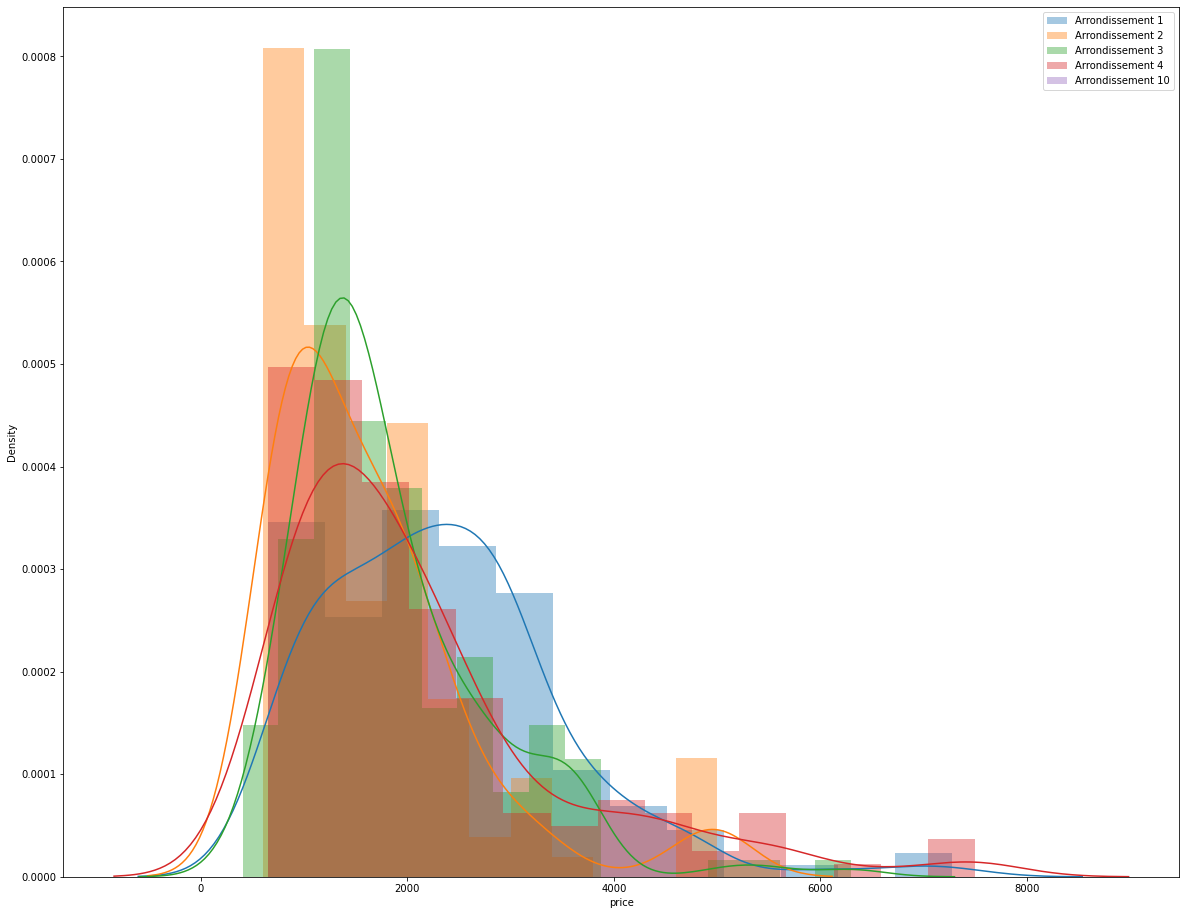

In [218]:
# Price/arrondissement
plt.figure(figsize=(20,16))
sns.distplot(arr1_df['price'], label='Arrondissement 1')
sns.distplot(arr2_df['price'], label='Arrondissement 2')
sns.distplot(arr3_df['price'], label='Arrondissement 3')
sns.distplot(arr4_df['price'], label='Arrondissement 4')
sns.distplot(arr10_df['price'], label='Arrondissement 10')
plt.legend()
plt.show()

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

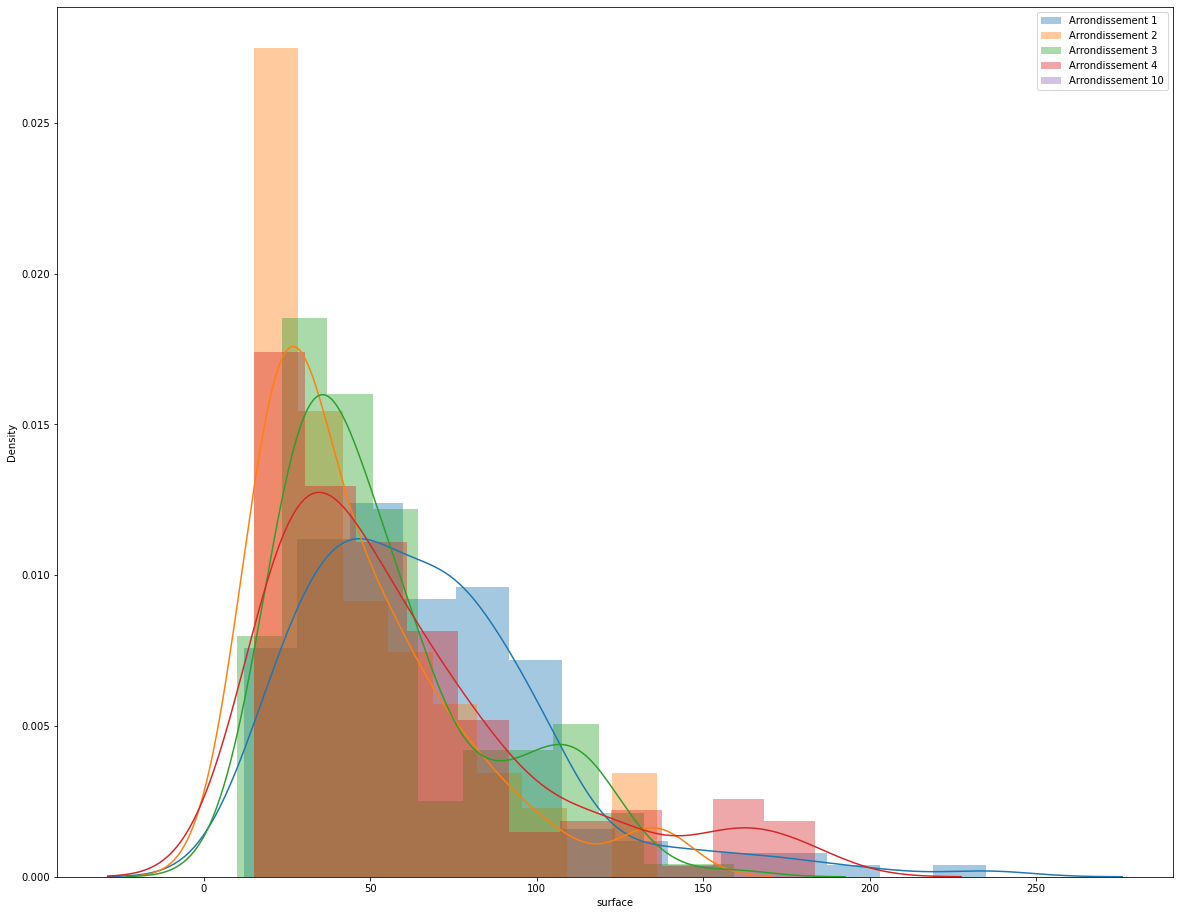

In [219]:
# Surface/arrondissement
plt.figure(figsize=(20,16))
sns.distplot(arr1_df['surface'], label='Arrondissement 1')
sns.distplot(arr2_df['surface'], label='Arrondissement 2')
sns.distplot(arr3_df['surface'], label='Arrondissement 3')
sns.distplot(arr4_df['surface'], label='Arrondissement 4')
sns.distplot(arr10_df['surface'], label='Arrondissement 10')
plt.legend()
plt.show()

<AxesSubplot:xlabel='surface', ylabel='count'>

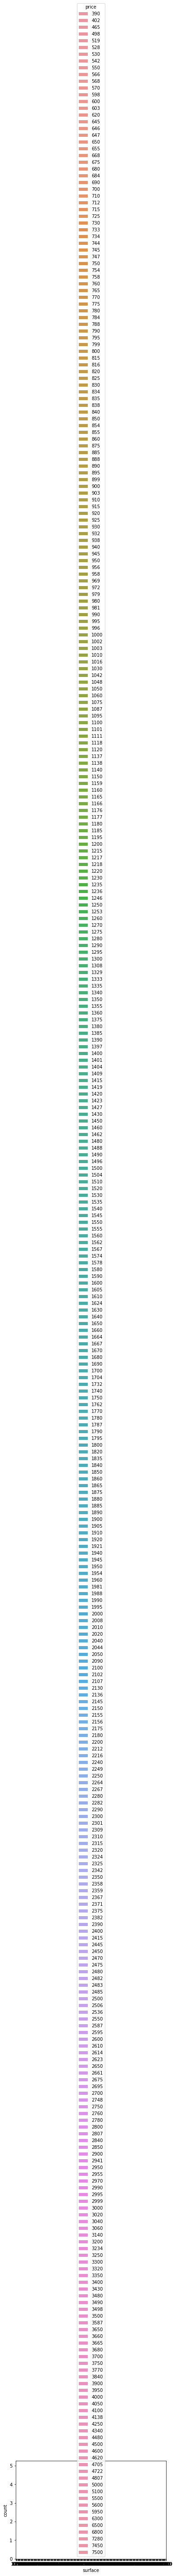

In [220]:
sns.countplot(x='surface', hue='price', data=df)
plt.show()

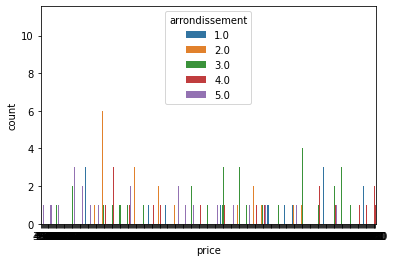

In [221]:
sns.countplot(x='price', hue='arrondissement', data=df)
plt.show()

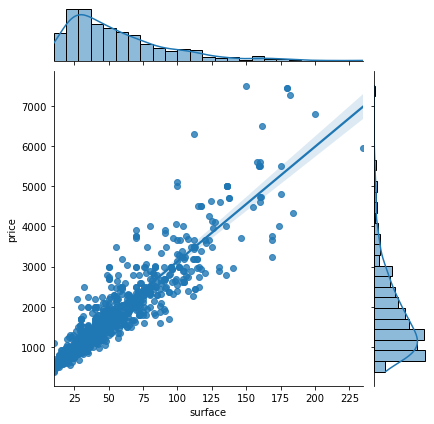

In [223]:
sns.jointplot(x='surface', y='price', data=df, kind='reg')
plt.show()

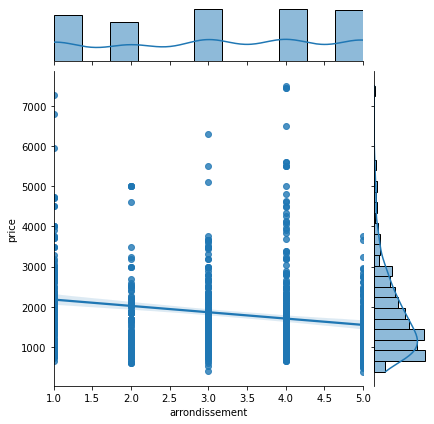

In [224]:
sns.jointplot(x='arrondissement', y='price', data=df, kind='reg')
plt.show()

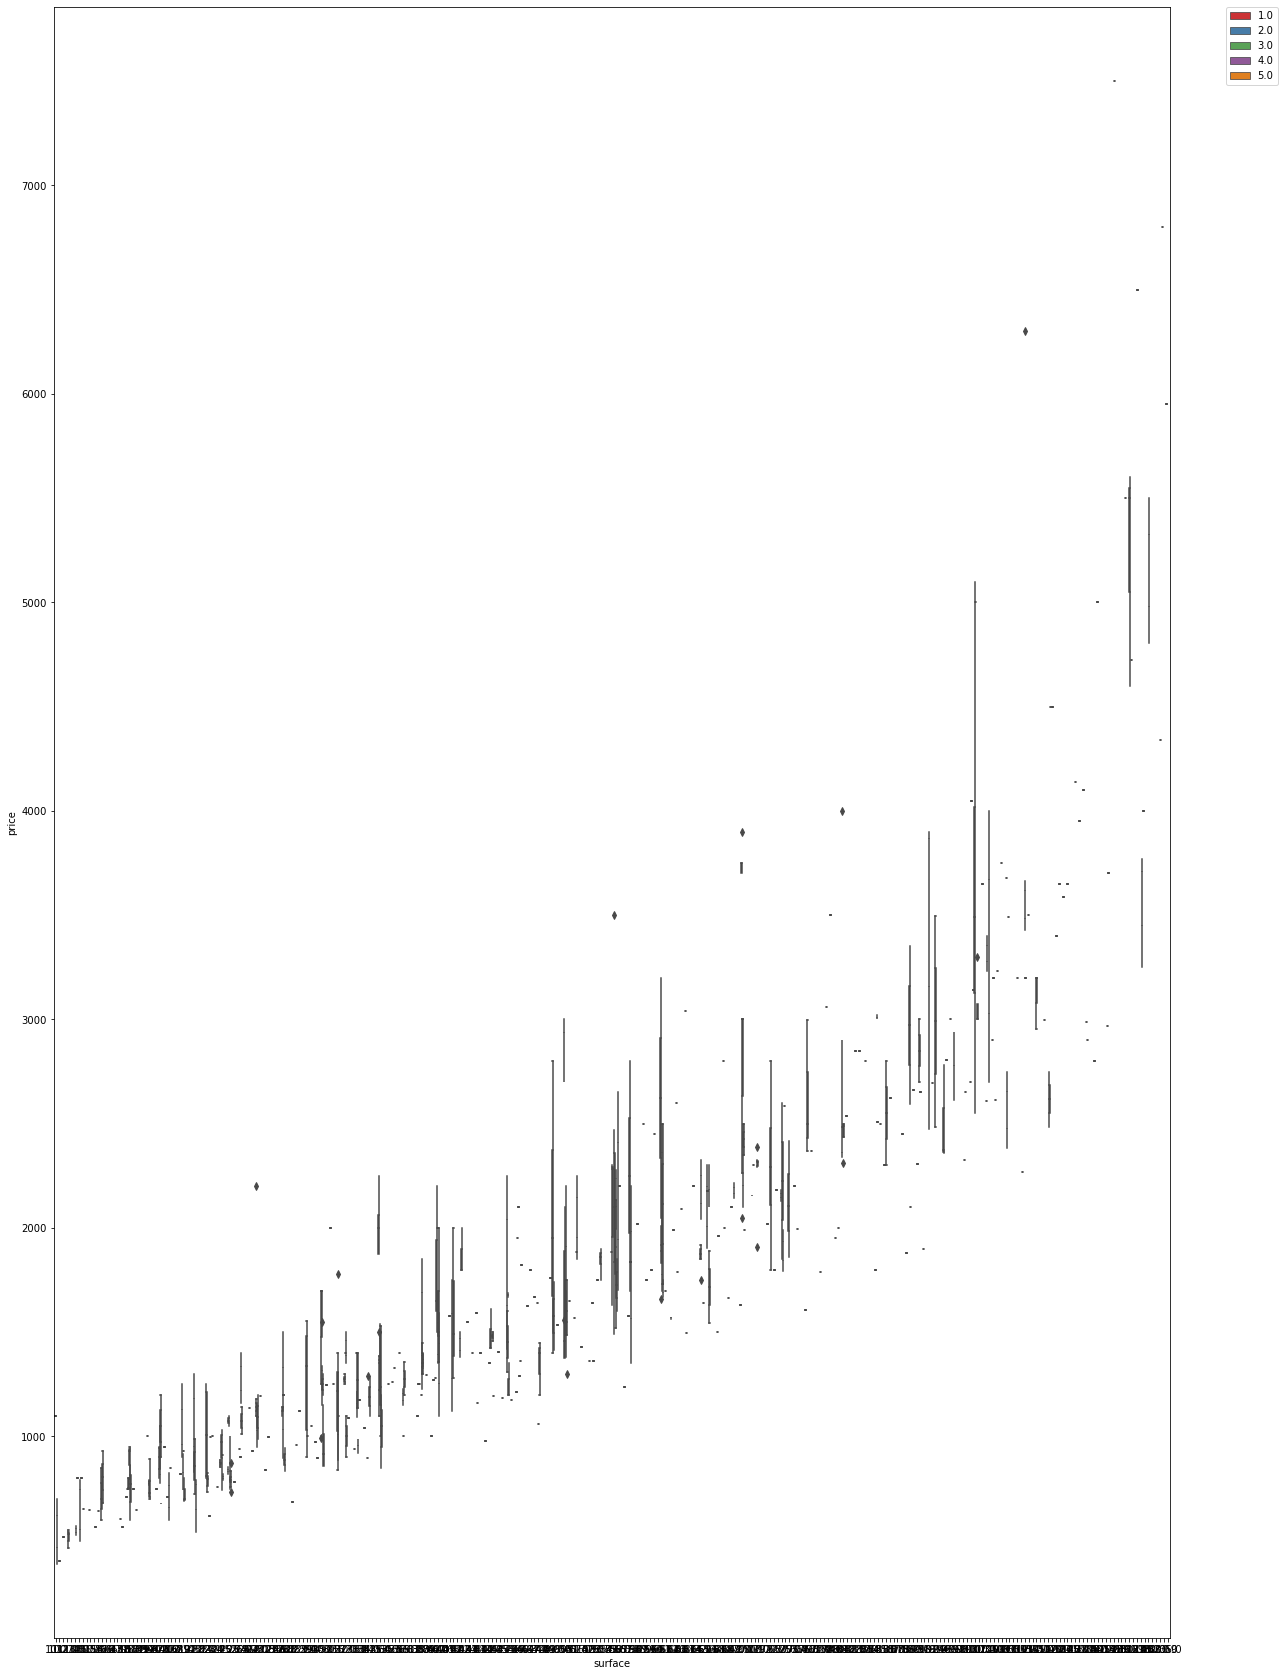

In [227]:
plt.figure(figsize=(20,30))
sns.boxplot(x='surface', y='price', hue='arrondissement', data=df, palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.draw()

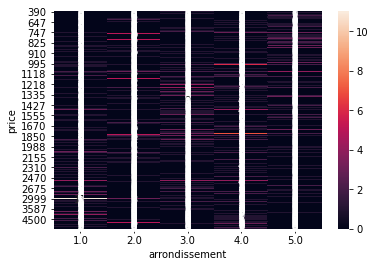

In [229]:
plt.figure()
sns.heatmap(pd.crosstab(df['price'], df['arrondissement']), annot=True, fmt='d')
plt.show()

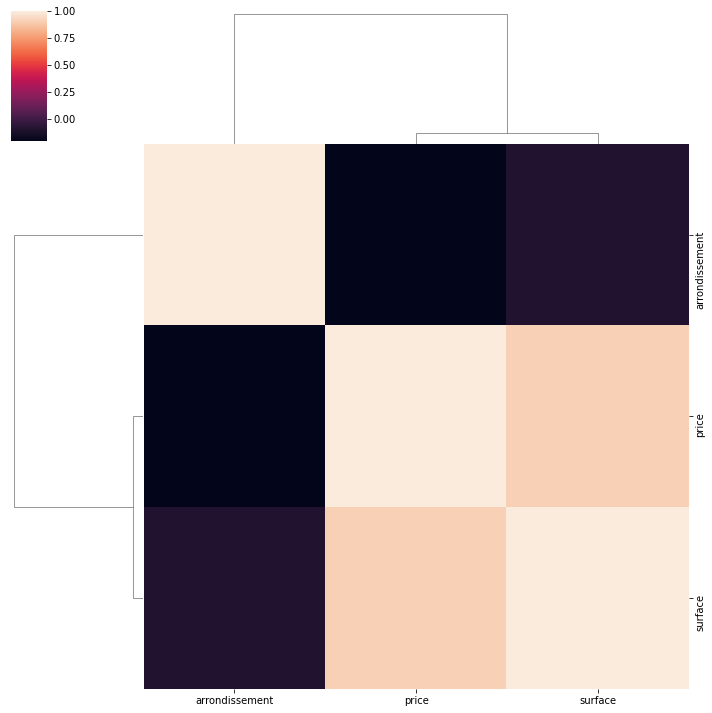

In [230]:
sns.clustermap(df.corr())

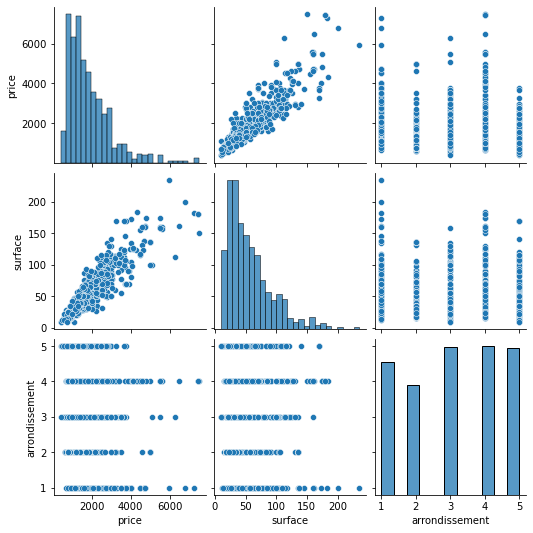

In [225]:
sns.pairplot(df)
plt.draw()

## <span class="bg-info"> 4. Imputation</span> 

In [ ]:
# pas la peine toutes les valeurs sont remplies

## <span class="bg-info"> 5. Feature ingineering</span> 

In [ ]:
# pas la peine les données sont simples

## <span class="bg-info"> 6. Bilan du nettoyage</span> 

<AxesSubplot:>

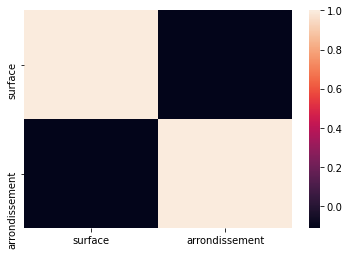

In [195]:
col_to_keep=['surface','arrondissement']
X = df[col_to_keep]
sns.heatmap(X.corr())

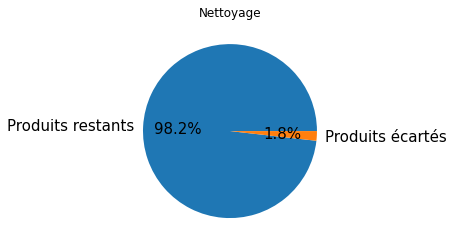

In [196]:
nettoyage = pd.DataFrame({'Products count': [house_data.shape[0], house_data.shape[0]-X.shape[0]]},index=['Produits restants', 'Produits écartés'])
plot = nettoyage.plot.pie(y='Products count', figsize=(4,4), autopct='%1.1f%%', title = 'Nettoyage', fontsize=15, legend = False)
plot = plt.ylabel('')

## <span class="bg-info"> 7. TRAIN SET</span> 

In [232]:
# D'abord, séparation jeu de données d'entraînement / jeu de données test

In [231]:
xtrain, xtest, ytrain, ytest = train_test_split(df[["surface", "arrondissement"]], df[["price"]], test_size=0.3)

## <span class="bg-info"> 8. MODELE</span> 

In [233]:
# Créons ensuite la baseline, et calculons le R2 (la somme quadratique des
# résidus), comme valeur d'évaluation de notre regression

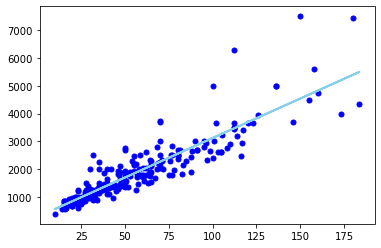

In [235]:
# création du modèle
model = LinearRegression()
# entrainement du modèle
lr = LinearRegression()
lr_baseline = lr.fit(xtrain[["surface"]], ytrain)

# prédictions
baseline_pred = lr_baseline.predict(xtest[["surface"]])

plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], baseline_pred, color="skyblue", linewidth = 2)
plt.show()

## <span class="bg-info"> 9. SCORING</span> 

In [237]:
# On réécrit rapidement le calcul du R2 score
def sumsq(x,y):
    return sum((x - y)**2)

def r2score(pred, target):
    return 1 - sumsq(pred, target) / sumsq(target, np.mean(target))

score_bl = r2score(baseline_pred[:,0], ytest['price'])

print(score_bl)

0.8091035896222726


In [238]:
lrs = []
for i in np.unique(xtrain["arrondissement"]):
    
    # On génère un jeu de données par arrondissement
    tr_arr = xtrain['arrondissement']==i
    te_arr = xtest['arrondissement']==i
    
    xtrain_arr = xtrain[tr_arr]
    ytrain_arr = ytrain[tr_arr]

    xtest_arr = xtest[te_arr]
    ytest_arr = ytest[te_arr]

    lr = LinearRegression()
    lr.fit(xtrain_arr[["surface"]], ytrain_arr)
    lrs.append(lr)

In [240]:
# On effectue la prédiction finale sur le jeu de donnée test avec notre 
# nouveau modèle, qui combine les différents modèles par arrondissement

In [241]:
final_pred = []

for idx,val in xtest.iterrows():
    final_pred.append(lrs[int(val["arrondissement"]-1)].predict([[val["surface"]]])[0][0])
    
r2score(final_pred, ytest["price"])

0.8400813388752264

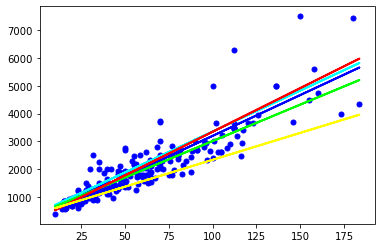

In [243]:
# On peut afficher cette prédiction finale
plt.plot(xtest[["surface"]], ytest, 'bo', markersize = 5)
plt.plot(xtest[["surface"]], lrs[0].predict(xtest[["surface"]]), color="#00FFFF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[1].predict(xtest[["surface"]]), color="#0000FF", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[2].predict(xtest[["surface"]]), color="#00FF00", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[3].predict(xtest[["surface"]]), color="#FF0000", linewidth = 2)
plt.plot(xtest[["surface"]], lrs[4].predict(xtest[["surface"]]), color="#FFFF00", linewidth = 2)
plt.show()

In [ ]:
# Quelques features supplémentaires que l'on pourrait ajouter pour améliorer ce modèle :
# la distance aux écoles ou bouche de métro,
# la localisation (Lat/long) ce qui permettrait d'explorer une approche avec un modèle Knn
# l'étage
# avec ou sans ascenseur
# neuf/ancien
# ...